# CSCI 3202, Fall 2025
### Homework 7
### 100 Points
### Due: October 24 by 11:59 pm

<br> 

### Your name: Rey Stone

<br> 

---

# Mancala Game Implementation

In this assignment, you are tasked with implementing various functions for a Mancala game. The game is played on a board with specific rules, and you will need to implement the core game logic by completing the `play`, `valid_move`, and `winning_eval` functions. You are provided with the `init` and `display_board` functions. The assignment is divided into two parts:

## Mancala rules for this homework assignment
**(there are many different rules sets for Mancala.  Please read this before writing the code)**

* Players sit on opposite sides of the long edge of the board
* There are 6 small pits in the middle of the board and 2 large ones at each end.  The small ones in the middle and the large pit on your right are yours.  The small ones on the other side and the large pit to your opponent's right are theirs
* The large pits at the end of the board are called Mancalas
* Set up the board with 4 stones per small pit (none in the mancalas)
* On every turn, select a pit on your side of the board that contains one or more stones,  then distribute its stones, one stone per pit, in an counter-clockwise direction until you have no stones remaining
* If you encounter your opponent's mandala, skip it
* If you encounter your mancala, drop a stone into it
* If the last stone lands in an empty pit on your side of the board, capture this stone and any stones in your opponent's pit on the other side of the board, collect all of these stones, including the one that just landed, and place them into your mancala.
* If either player's pits are entirely empty, the game concludes. 
* The player who still has stones on his side of the board when the game concludes places all of these pieces into their mancala.
The player with the most stones in their mancala is declared the winner. If both players have an equal number of stones in their mancala, the game results in a tie.


## Part 1: Small Board (3 Pits of 2 Stones each) (60 points)

For the first part of the assignment, students will work on a small Mancala board. The board consists of 3 pits, each initially containing 2 stones. The students need to implement the following:

1. **play**: Implement the `play` function to allow players to take turns and make moves. The function should correctly distribute stones according to the specified game rules. The game should also switch between players after each play. **(20 points)**

2. **valid_move**: Implement the `valid_move` function to ensure that a player's chosen move is valid. It should check if the selected pit is not empty and falls within the allowed pit range. **(20 points)**

3. **winning_eval**: Implement the `winning_eval` function to determine when the game is over and which player wins. The game ends when any player's pits are all empty. The winner is the player with the most stones in their mancala. If both mancalas have the same number of stones, it's a tie. **(20 points)**

Students should test their code by playing a sequence of moves shown below.

P1 picks pit 1, P2 picks pit 2, P1 picks pit 3...and so on.  The pits are 1-indexed when displaying and picking to make a move.  Make sure that your code gives an invalid move error when the pit chosen is empty or the pit choice is out of range.




## Part 2: Play Against a Random Player (6 Pits of 4 Stones each) (40 points)

In the second part of the assignment, students will extend their implementation to a larger board. The board consists of 6 pits with 4 stones in each pit. In addition to the `play`, `valid_move`, and `winning_eval` functions, students need to create a random move generator for a random player. This random player selects a random valid pit with stones to make a move. The following steps are involved in creating the random move generator:

1. **Random Move Generator**: Define the `random_move_generator` that selects a random pit from the available non-empty pits for the random player. The random player should choose a move based on these criteria. \
Set the 'seed' value to ensure that the generated values remain consistent and reproducible when grading.

You may refer to these links: [How to generate random integers in Python](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/#:~:text=Random%20integer%20values%20can%20be,for%20the%20generated%20integer%20values.), [How to use seed in Python random](https://www.w3schools.com/python/ref_random_seed.asp)


The objective is to play up to **10** moves in total (5 moves by student, 5 moves by random player), allowing the students to verify whether their code correctly implements the Mancala game logic. **(20 points for correct implementation of Random Move Generator)**

The output submitted should reflect the state of the board and the moves played. **(10 points for playing game, 10 points for printing out results)**

**Please make sure to call the `display_board` function after each move for both the parts and run all the cells before submitting**

In [5]:
import random
random.seed(109)

In [6]:
# re-importing here because it doesn't like me
import random
random.seed(109)

class Mancala:
    def __init__(self, pits_per_player=6, stones_per_pit=4):
        """
        The constructor for the Mancala class defines several instance variables:

        pits_per_player: This variable stores the number of pits each player has.
        stones_per_pit: It represents the number of stones each pit contains at the start of any game.
        board: This data structure is responsible for managing the Mancala board.
        current_player: This variable takes the value 1 or 2, as it's a two-player game, indicating which player's turn it is.
        moves: This is a list used to store the moves made by each player. It's structured in the format (current_player, chosen_pit).
        p1_pits_index: A list containing two elements representing the start and end indices of player 1's pits in the board data structure.
        p2_pits_index: Similar to p1_pits_index, it contains the start and end indices for player 2's pits on the board.
        p1_mancala_index and p2_mancala_index: These variables hold the indices of the Mancala pits on the board for players 1 and 2, respectively.
        """
        self.pits_per_player = pits_per_player
        self.board = [stones_per_pit] * ((pits_per_player + 1) * 2)  # Initialize each pit with stones_per_pit number of stones
        self.players = 2
        self.current_player = 1
        self.moves = []
        self.p1_pits_index = [0, self.pits_per_player - 1]
        self.p1_mancala_index = self.pits_per_player
        self.p2_pits_index = [self.pits_per_player + 1, len(self.board) - 1 - 1]
        self.p2_mancala_index = len(self.board) - 1

        # Zeroing the Mancala for both players
        self.board[self.p1_mancala_index] = 0
        self.board[self.p2_mancala_index] = 0

    def display_board(self):
        """
        Displays the board in a user-friendly format
        """
        player_1_pits = self.board[self.p1_pits_index[0]: self.p1_pits_index[1] + 1]
        player_1_mancala = self.board[self.p1_mancala_index]
        player_2_pits = self.board[self.p2_pits_index[0]: self.p2_pits_index[1] + 1]
        player_2_mancala = self.board[self.p2_mancala_index]

        print('P1               P2')
        print('     ____{}____     '.format(player_2_mancala))
        for i in range(self.pits_per_player):
            if i == self.pits_per_player - 1:
                print('{} -> |_{}_|_{}_| <- {}'.format(i + 1, player_1_pits[i],
                                                       player_2_pits[-(i + 1)], self.pits_per_player - i))
            else:
                print('{} -> | {} | {} | <- {}'.format(i + 1, player_1_pits[i],
                                                       player_2_pits[-(i + 1)], self.pits_per_player - i))

        print('         {}         '.format(player_1_mancala))
        turn = 'P1' if self.current_player == 1 else 'P2'
        print('Turn: ' + turn)

    def valid_move(self, pit):
        """
        Function to check if the pit chosen by the current_player is a valid move.
        """

        # write your code here
        return True if pit in range(0, len(self.board)) and self.board[pit] != 0 else False

    def random_move_generator(self):
        """
        Function to generate random valid moves with non-empty pits for the random player
        """

        # write your code here
        if self.current_player == 1:
            pits = range(self.p1_pits_index[0], self.p1_pits_index[1]+1)
        else:
            pits = range(self.p2_pits_index[0], self.p2_pits_index[1]+1)

        available_pits = [x for x in pits if self.board[x] > 0]

        if not available_pits:
            print('No available pits')

        chosen_pit = random.choice(available_pits)

        if self.current_player == 1:
            pit_num = chosen_pit + 1
        else:
            pit_num = chosen_pit - self.p1_mancala_index

        self.play(pit_num)


    def play(self, pit):
        """
        This function simulates a single move made by a specific player using their selected pit. It primarily performs three tasks:
        1. It checks if the chosen pit is a valid move for the current player. If not, it prints "INVALID MOVE" and takes no action.
        2. It verifies if the game board has already reached a winning state. If so, it prints "GAME OVER" and takes no further action.
        3. After passing the above two checks, it proceeds to distribute the stones according to the specified Mancala rules.

        Finally, the function then switches the current player, allowing the other player to take their turn.
        """

        # write your code here
        if self.winning_eval():
            print("GAME OVER")
            return

        pit_index = self.get_pit_index(pit)
        print(f'Player {self.current_player} chose pit: {pit}')

        if not self.valid_move(pit_index):
            print("INVALID MOVE")
            self.switch_player()
            return
        self.moves.append((self.current_player, pit))

        stones = self.board[pit_index]  # stones in pit
        self.board[pit_index] = 0  # empty current pit

        index = pit_index
        while stones > 0:
            index = (index + 1) % len(self.board)

            # skip over opponent's mancala
            if self.current_player == 1 and index == self.p2_mancala_index:
                continue
            if self.current_player == 2 and index == self.p1_mancala_index:
                continue

            self.board[index] += 1
            stones -= 1

        last_pit = index

        if self.current_player == 1 and self.p1_pits_index[0] <= last_pit <= self.p1_pits_index[1] :
            if self.board[last_pit] == 1: # if pit was empty before, and now it has one
                opp_pit = len(self.board) - 2 - last_pit

                if self.board[last_pit] > 0:
                    captured_stones = self.board[last_pit] + self.board[opp_pit]
                    self.board[last_pit] = 0
                    self.board[opp_pit] = 0
                    self.board[self.p1_mancala_index] = captured_stones

        if self.current_player == 2 and self.p2_pits_index[0] <= last_pit <= self.p2_pits_index[1] :
            if self.board[last_pit] == 1: # if pit was empty before, and now it has one
                opp_pit = len(self.board) - 2 - last_pit
                if self.board[last_pit] > 0:
                    captured_stones = self.board[last_pit] + self.board[opp_pit]
                    self.board[last_pit] = 0
                    self.board[opp_pit] = 0
                    self.board[self.p2_mancala_index] = captured_stones

        self.switch_player()

    # helper function to get the pit index
    def get_pit_index(self, pit_num):
        if self.current_player == 1:
            return pit_num - 1
        else:
            return self.p1_mancala_index + pit_num

    # helper function to switch the players more easily
    def switch_player(self):
        self.current_player = 2 if self.current_player == 1 else 1


    def winning_eval(self):
        """
        Function to verify if the game board has reached the winning state.
        Hint: If either of the players' pits are all empty, then it is considered a winning state.
        """

        # write your code here
        p1_empty = all(self.board[i] == 0 for i in range(self.p1_pits_index[0], self.p1_pits_index[1]+1))
        p2_empty = all(self.board[i] == 0 for i in range(self.p2_pits_index[0], self.p2_pits_index[1]+1))

        return p1_empty or p2_empty


In [7]:
# Mancala part 1 
game = Mancala(pits_per_player=3, stones_per_pit=2)
game.display_board()

# Player 1 selects pit 1 (1-based index)
game.play(1)
game.display_board()

# Player 2 selects pit 2
game.play(2)
game.display_board()

# Player 1 selects pit 3
game.play(3)
game.display_board()

# Player 2 selects pit 2
game.play(2)
game.display_board()

# Player 1 selects pit 1
game.play(1)
game.display_board()

# Printing the list of moves
print("\nList of valid moves:")
for move in game.moves:
    player, pit = move
    print(f"Player {player} selected pit {pit}")


P1               P2
     ____0____     
1 -> | 2 | 2 | <- 3
2 -> | 2 | 2 | <- 2
3 -> |_2_|_2_| <- 1
         0         
Turn: P1
Player 1 chose pit: 1
P1               P2
     ____0____     
1 -> | 0 | 2 | <- 3
2 -> | 3 | 2 | <- 2
3 -> |_3_|_2_| <- 1
         0         
Turn: P2
Player 2 chose pit: 2
P1               P2
     ____1____     
1 -> | 0 | 3 | <- 3
2 -> | 3 | 0 | <- 2
3 -> |_3_|_2_| <- 1
         0         
Turn: P1
Player 1 chose pit: 3
P1               P2
     ____1____     
1 -> | 0 | 3 | <- 3
2 -> | 3 | 1 | <- 2
3 -> |_0_|_3_| <- 1
         1         
Turn: P2
Player 2 chose pit: 2
P1               P2
     ____1____     
1 -> | 0 | 4 | <- 3
2 -> | 3 | 0 | <- 2
3 -> |_0_|_3_| <- 1
         1         
Turn: P1
Player 1 chose pit: 1
INVALID MOVE
P1               P2
     ____1____     
1 -> | 0 | 4 | <- 3
2 -> | 3 | 0 | <- 2
3 -> |_0_|_3_| <- 1
         1         
Turn: P2

List of valid moves:
Player 1 selected pit 1
Player 2 selected pit 2
Player 1 selected pit 3
Player 2 

#### Expected output for part 1

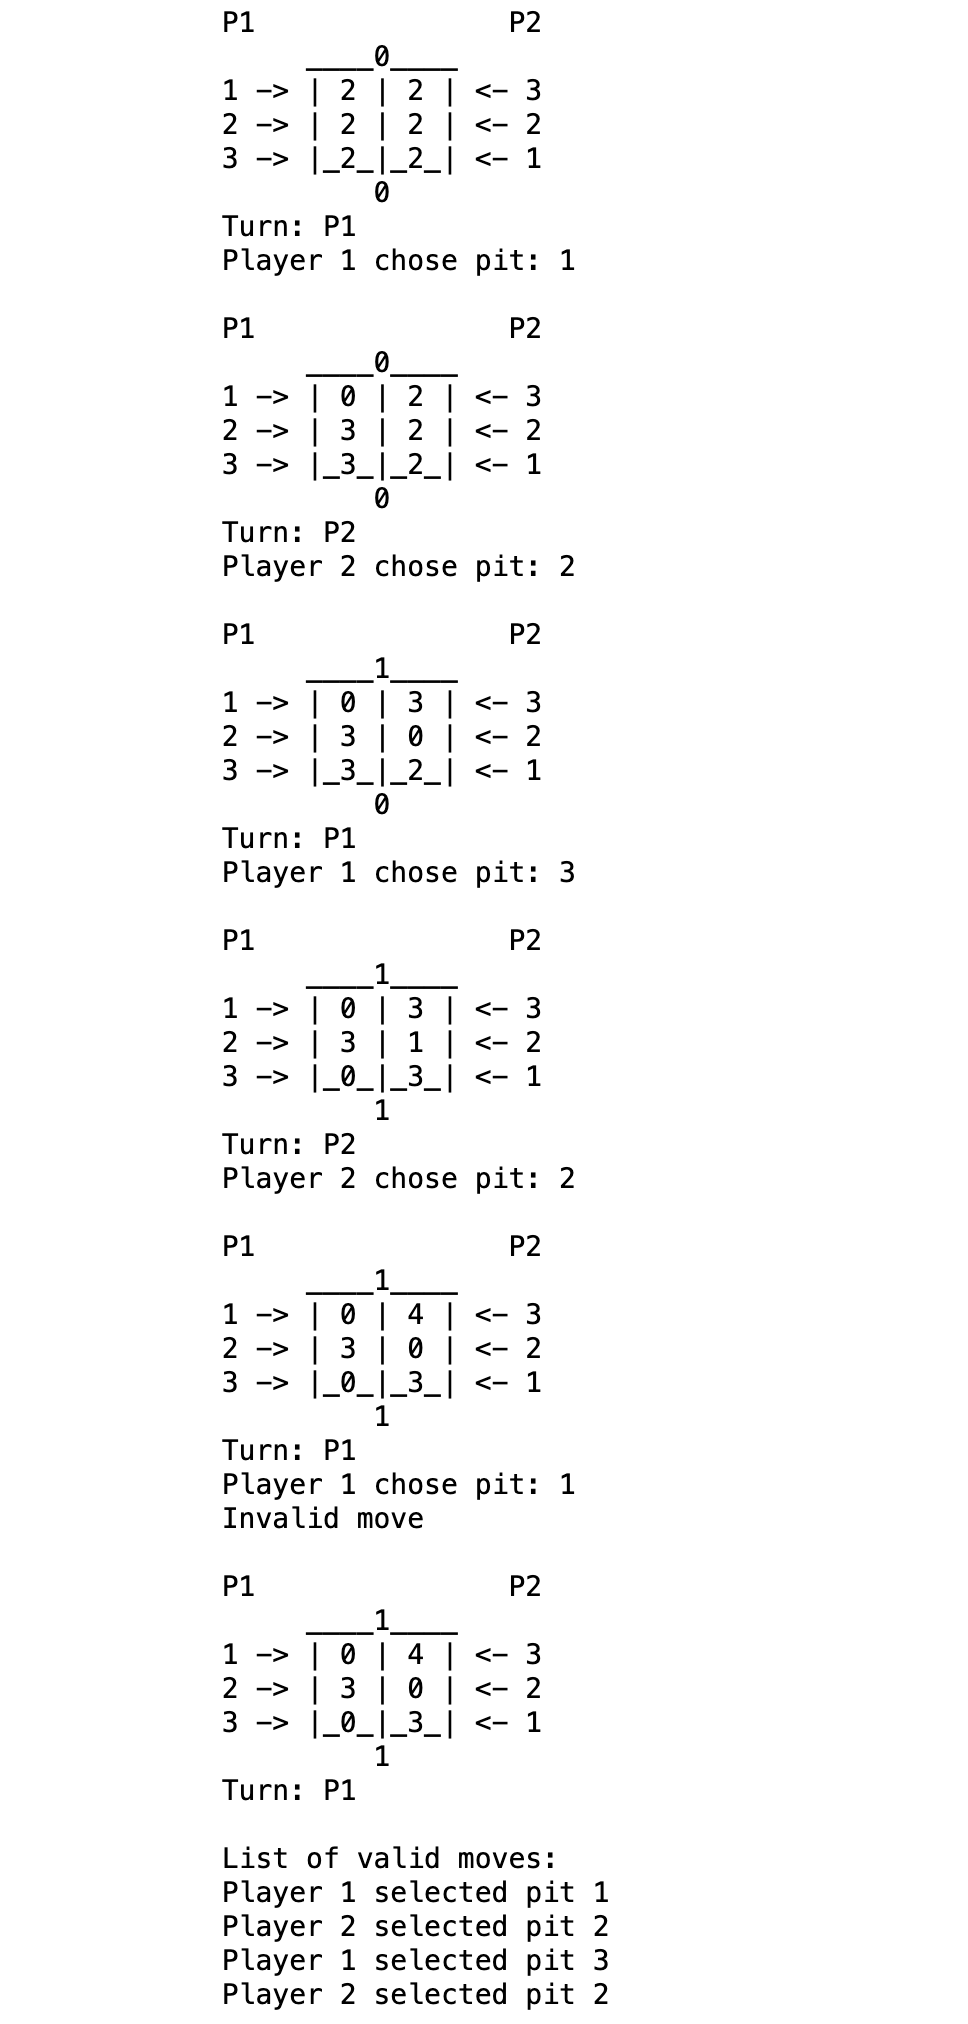

In [8]:
# Mancala part 2
game = Mancala(pits_per_player=6, stones_per_pit=4)
game.display_board()

# turn 1
game.play(3)
game.display_board()

game.random_move_generator()
game.display_board()

# turn 2
game.play(6)
game.display_board()

game.random_move_generator()
game.display_board()

# turn 3
game.play(5)
game.display_board()

game.random_move_generator()
game.display_board()

# turn 4
game.play(2)
game.display_board()

game.random_move_generator()
game.display_board()

# turn 5
game.play(1)
game.display_board()

game.random_move_generator()
game.display_board()

P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 4 | 4 | <- 4
4 -> | 4 | 4 | <- 3
5 -> | 4 | 4 | <- 2
6 -> |_4_|_4_| <- 1
         0         
Turn: P1
Player 1 chose pit: 3
P1               P2
     ____0____     
1 -> | 4 | 4 | <- 6
2 -> | 4 | 4 | <- 5
3 -> | 0 | 4 | <- 4
4 -> | 5 | 4 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         1         
Turn: P2
Player 2 chose pit: 3
P1               P2
     ____1____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 5 | <- 4
4 -> | 5 | 0 | <- 3
5 -> | 5 | 4 | <- 2
6 -> |_5_|_4_| <- 1
         1         
Turn: P1
Player 1 chose pit: 6
P1               P2
     ____1____     
1 -> | 4 | 5 | <- 6
2 -> | 4 | 5 | <- 5
3 -> | 0 | 6 | <- 4
4 -> | 5 | 1 | <- 3
5 -> | 5 | 5 | <- 2
6 -> |_0_|_5_| <- 1
         2         
Turn: P2
Player 2 chose pit: 2
P1               P2
     ____2____     
1 -> | 4 | 6 | <- 6
2 -> | 4 | 6 | <- 5
3 -> | 0 | 7 | <- 4
4 -> | 5 | 2 | <- 3
5 -> | 5 | 0 | <- 2
6 -> |_0_|_5_| <